In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
df=pd.read_csv("CVD_cleaned.csv")


In [13]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [15]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [16]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [17]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height_(cm)'>

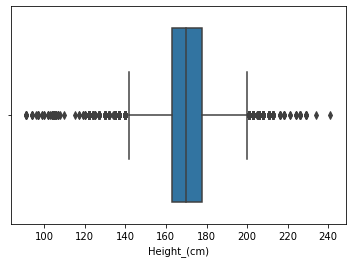

In [18]:
sns.boxplot(df['Height_(cm)'])

In [19]:
q1=df['Height_(cm)'].quantile(0.25)

In [20]:
q3=df['Height_(cm)'].quantile(0.75)

In [21]:
IQR=q3-q1

In [22]:
lower=q1-1.5*IQR

In [23]:
upper=q3+1.5*IQR

In [24]:
df=df[(df['Height_(cm)']>lower) & (df['Height_(cm)']<upper)]

In [25]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight_(kg)'>

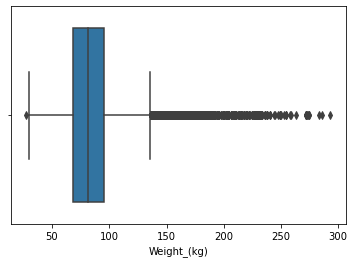

In [26]:
sns.boxplot(df['Weight_(kg)'])

In [27]:
q1=df['Weight_(kg)'].quantile(0.25)

In [28]:
q3=df['Weight_(kg)'].quantile(0.75)

In [29]:
IQR=q3-q1

In [30]:
lower=q1-1.5*IQR

In [31]:
upper=q3+1.5*IQR

In [32]:
df=df[(df['Weight_(kg)']>lower) & (df['Weight_(kg)']<upper)]

In [33]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

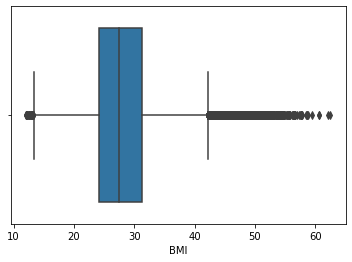

In [34]:
sns.boxplot(df['BMI'])

In [35]:
q1=df['BMI'].quantile(0.25)

In [36]:
q3=df['BMI'].quantile(0.75)

In [37]:
IQR=q3-q1

In [38]:
lower=q1-1.5*IQR

In [39]:
upper=q3+1.5*IQR

In [40]:
df=df[(df['BMI']>lower) & (df['BMI']<upper)]

In [41]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol_Consumption'>

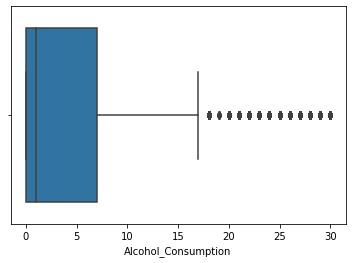

In [42]:
sns.boxplot(df['Alcohol_Consumption'])

In [43]:
q1=df['Alcohol_Consumption'].quantile(0.25)

In [44]:
q3=df['Alcohol_Consumption'].quantile(0.75)

In [45]:
IQR=q3-q1

In [46]:
lower=q1-1.5*IQR

In [47]:
upper=q3+1.5*IQR

In [48]:
df=df[(df['Alcohol_Consumption']>lower) & (df['Alcohol_Consumption']<upper)]

In [49]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fruit_Consumption'>

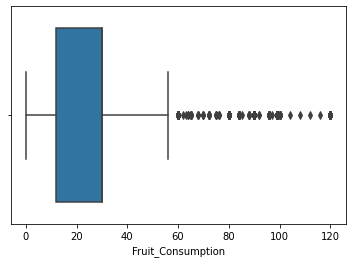

In [50]:
sns.boxplot(df['Fruit_Consumption'])

In [51]:
q1=df['Fruit_Consumption'].quantile(0.25)

In [52]:
q3=df['Fruit_Consumption'].quantile(0.75)

In [53]:
IQR=q3-q1

In [54]:
lower=q1-1.5*IQR

In [55]:
upper=q3+1.5*IQR

In [56]:
df=df[(df['Fruit_Consumption']>lower) & (df['Fruit_Consumption']<upper)]

In [57]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Green_Vegetables_Consumption'>

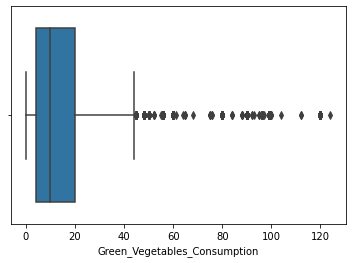

In [58]:
sns.boxplot(df['Green_Vegetables_Consumption'])

In [59]:
q1=df['Green_Vegetables_Consumption'].quantile(0.25)

In [60]:
q3=df['Green_Vegetables_Consumption'].quantile(0.75)

In [61]:
IQR=q3-q1

In [62]:
lower=q1-1.5*IQR

In [63]:
upper=q3+1.5*IQR

In [64]:
df=df[(df['Green_Vegetables_Consumption']>lower) & (df['Green_Vegetables_Consumption']<upper)]

In [65]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308848,Good,Within the past 5 years,Yes,No,No,No,No,No,No,Male,55-59,168.0,58.97,20.98,No,0.0,16.0,12.0,0.0
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FriedPotato_Consumption'>

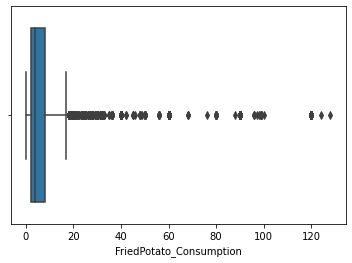

In [66]:
sns.boxplot(df['FriedPotato_Consumption'])

In [67]:
q1=df['FriedPotato_Consumption'].quantile(0.25)

In [68]:
q3=df['FriedPotato_Consumption'].quantile(0.75)

In [69]:
IQR=q3-q1

In [70]:
lower=q1-1.5*IQR

In [71]:
upper=q3+1.5*IQR

In [72]:
df=df[(df['FriedPotato_Consumption']>lower) & (df['FriedPotato_Consumption']<upper)]

In [73]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308848,Good,Within the past 5 years,Yes,No,No,No,No,No,No,Male,55-59,168.0,58.97,20.98,No,0.0,16.0,12.0,0.0
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


<AxesSubplot:xlabel='General_Health', ylabel='count'>

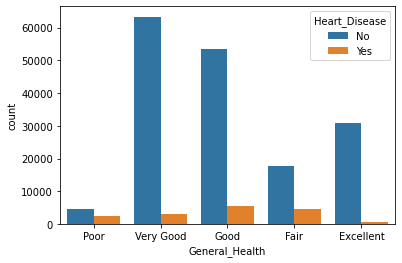

In [74]:
sns.countplot(x=df['General_Health'],hue=df['Heart_Disease'])

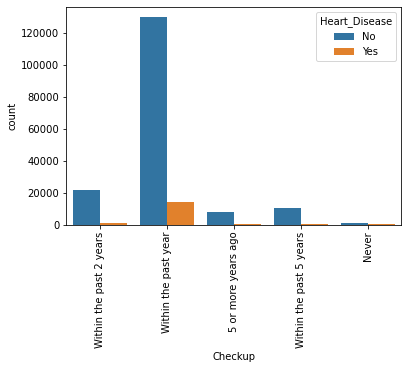

In [75]:
sns.countplot(x=df['Checkup'],hue=df['Heart_Disease'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Exercise', ylabel='count'>

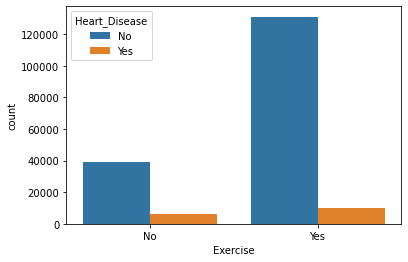

In [76]:
sns.countplot(x=df['Exercise'],hue=df['Heart_Disease'])

<AxesSubplot:xlabel='Skin_Cancer', ylabel='count'>

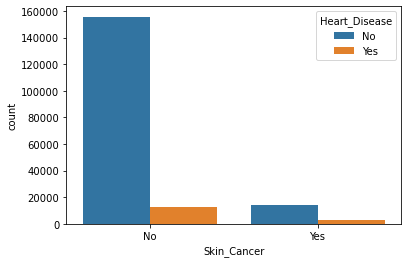

In [77]:
sns.countplot(x=df['Skin_Cancer'],hue=df['Heart_Disease'])

<AxesSubplot:xlabel='Other_Cancer', ylabel='count'>

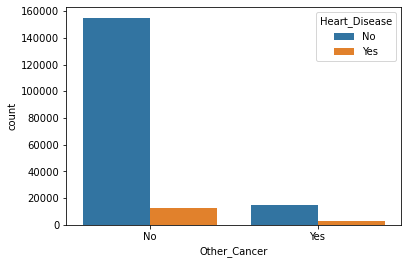

In [78]:
sns.countplot(x=df['Other_Cancer'],hue=df['Heart_Disease'])

<AxesSubplot:xlabel='Depression', ylabel='count'>

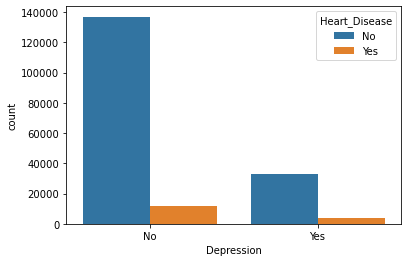

In [79]:
sns.countplot(x=df['Depression'],hue=df['Heart_Disease'])

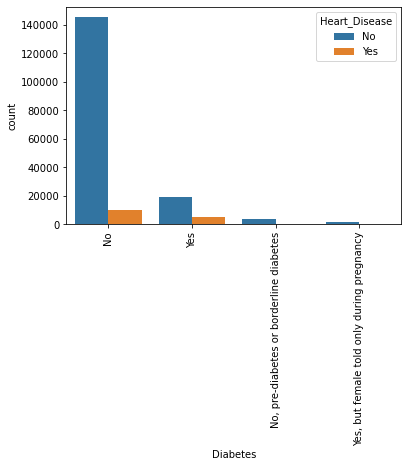

In [80]:
sns.countplot(x=df['Diabetes'],hue=df['Heart_Disease'])
plt.xticks(rotation=90)
plt.show()

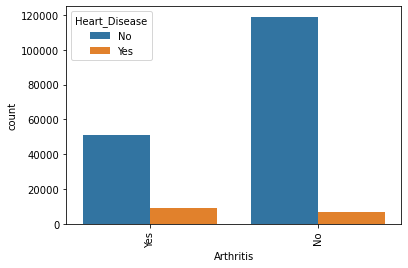

In [81]:
sns.countplot(x=df['Arthritis'],hue=df['Heart_Disease'])
plt.xticks(rotation=90)
plt.show()

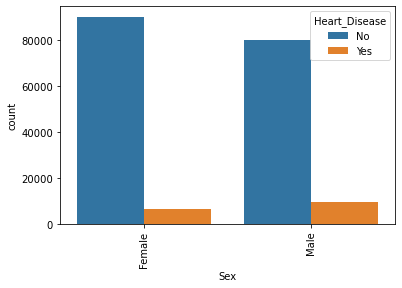

In [82]:
sns.countplot(x=df['Sex'],hue=df['Heart_Disease'])
plt.xticks(rotation=90)
plt.show()

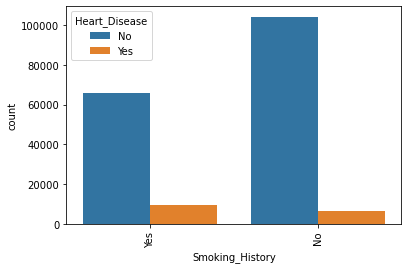

In [83]:

sns.countplot(x=df['Smoking_History'],hue=df['Heart_Disease'])
plt.xticks(rotation=90)
plt.show()

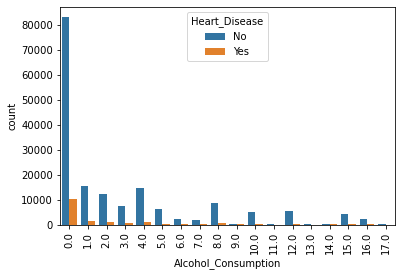

In [84]:
sns.countplot(x=df['Alcohol_Consumption'],hue=df['Heart_Disease'])
plt.xticks(rotation=90)
plt.show()

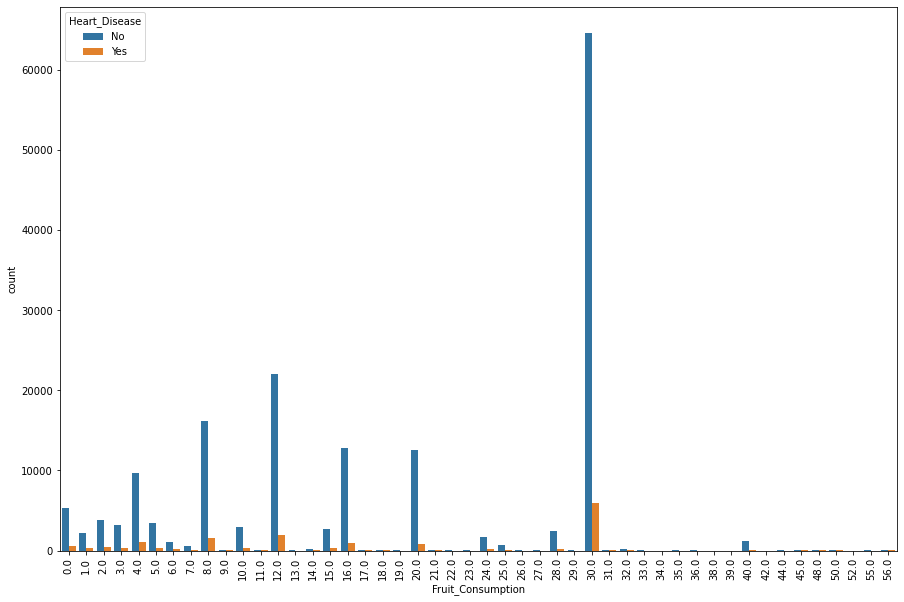

In [85]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Fruit_Consumption'],hue=df['Heart_Disease'])
plt.xticks(rotation=90)
plt.show()

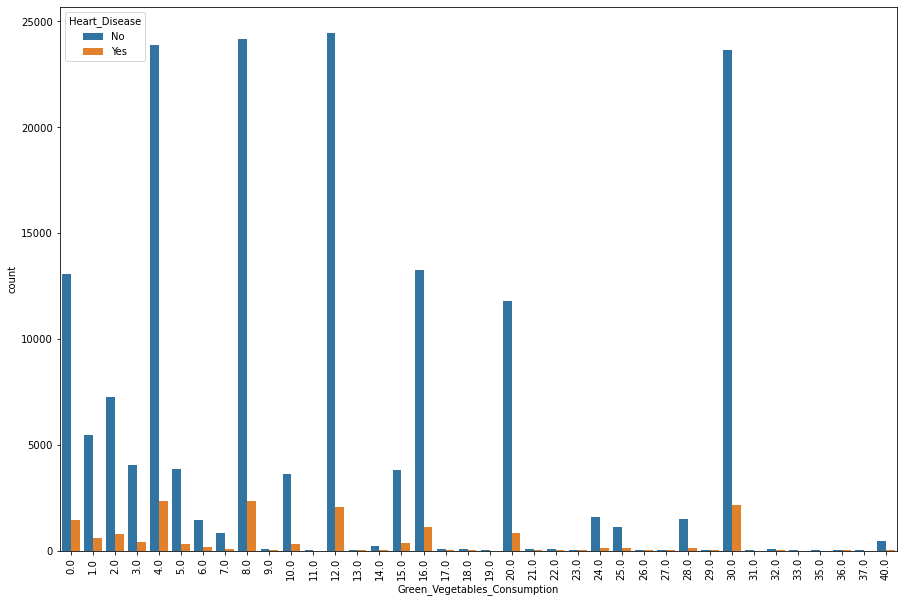

In [86]:

plt.figure(figsize=(15,10))
sns.countplot(x=df['Green_Vegetables_Consumption'],hue=df['Heart_Disease'])
plt.xticks(rotation=90)
plt.show()

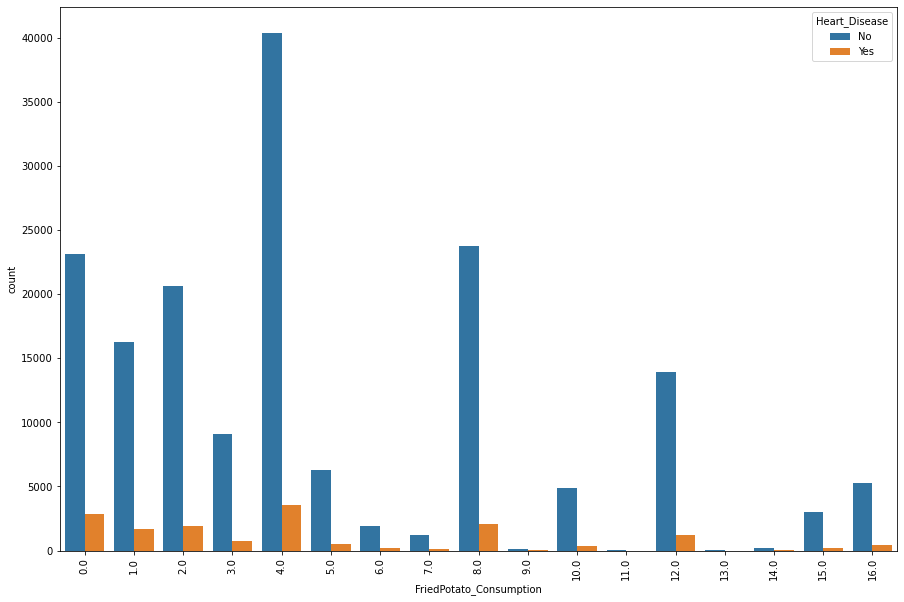

In [87]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['FriedPotato_Consumption'],hue=df['Heart_Disease'])
plt.xticks(rotation=90)
plt.show()

In [88]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


<AxesSubplot:xlabel='General_Health', ylabel='BMI'>

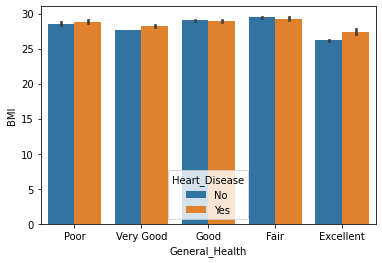

In [89]:
sns.barplot(x=df['General_Health'],y=df['BMI'],hue=df['Heart_Disease'])

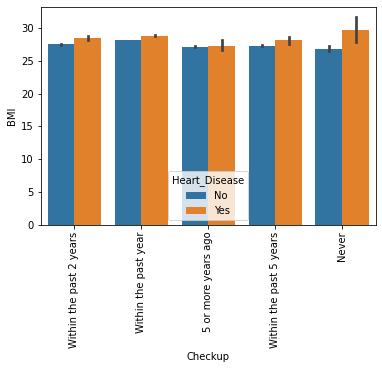

In [90]:
sns.barplot(x=df['Checkup'],y=df['BMI'],hue=df['Heart_Disease'])
plt.xticks(rotation=90)
plt.show()

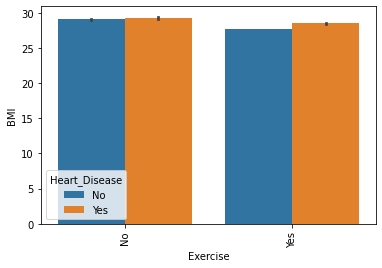

In [91]:
sns.barplot(x=df['Exercise'],y=df['BMI'],hue=df['Heart_Disease'])
plt.xticks(rotation=90)
plt.show()

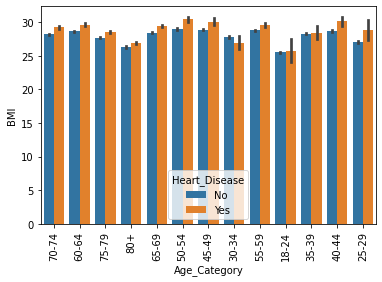

In [92]:
sns.barplot(x=df['Age_Category'],y=df['BMI'],hue=df['Heart_Disease'])
plt.xticks(rotation=90)
plt.show()

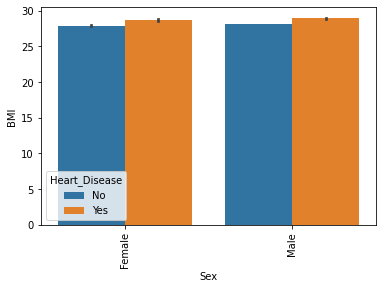

In [93]:
sns.barplot(x=df['Sex'],y=df['BMI'],hue=df['Heart_Disease'])
plt.xticks(rotation=90)
plt.show()

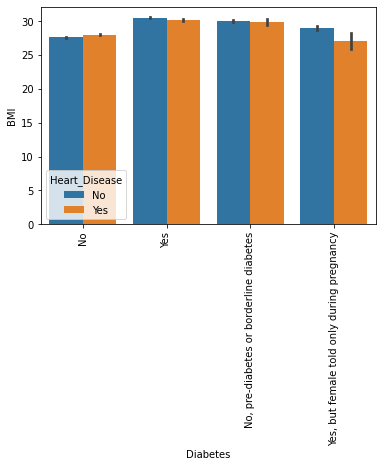

In [94]:
sns.barplot(x=df['Diabetes'],y=df['BMI'],hue=df['Heart_Disease'])
plt.xticks(rotation=90)
plt.show()

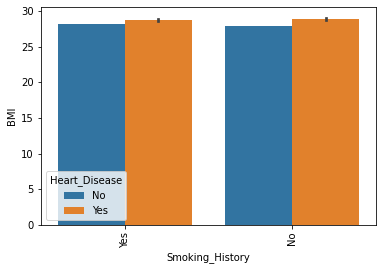

In [95]:
sns.barplot(x=df['Smoking_History'],y=df['BMI'],hue=df['Heart_Disease'])
plt.xticks(rotation=90)
plt.show()

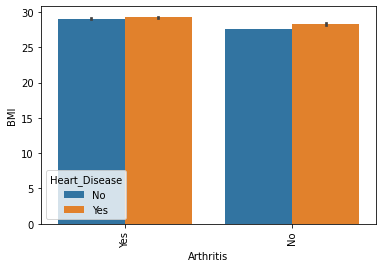

In [96]:

sns.barplot(x=df['Arthritis'],y=df['BMI'],hue=df['Heart_Disease'])
plt.xticks(rotation=90)
plt.show()

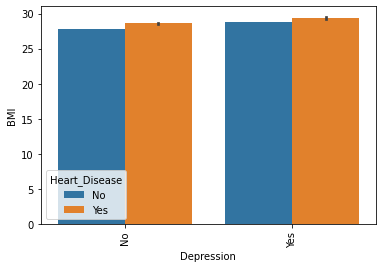

In [97]:
sns.barplot(x=df['Depression'],y=df['BMI'],hue=df['Heart_Disease'])
plt.xticks(rotation=90)
plt.show()

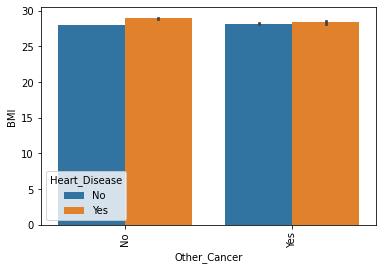

In [98]:
sns.barplot(x=df['Other_Cancer'],y=df['BMI'],hue=df['Heart_Disease'])
plt.xticks(rotation=90)
plt.show()

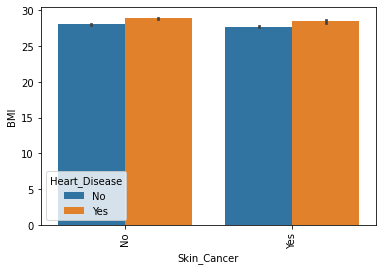

In [99]:
sns.barplot(x=df['Skin_Cancer'],y=df['BMI'],hue=df['Heart_Disease'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Heart_Disease', ylabel='Height_(cm)'>

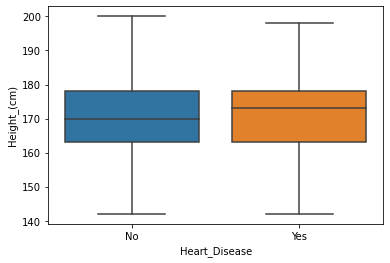

In [100]:
sns.boxplot(x=df['Heart_Disease'],y=df['Height_(cm)'])

<AxesSubplot:xlabel='Heart_Disease', ylabel='Weight_(kg)'>

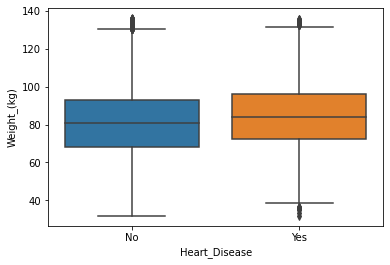

In [101]:
sns.boxplot(x=df['Heart_Disease'],y=df['Weight_(kg)'])

<AxesSubplot:xlabel='Heart_Disease', ylabel='BMI'>

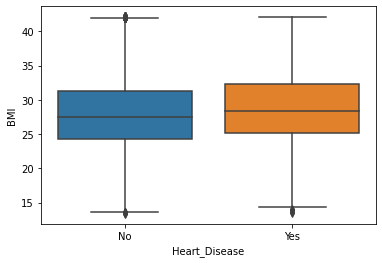

In [102]:
sns.boxplot(x=df['Heart_Disease'],y=df['BMI'])

<AxesSubplot:xlabel='Heart_Disease', ylabel='Alcohol_Consumption'>

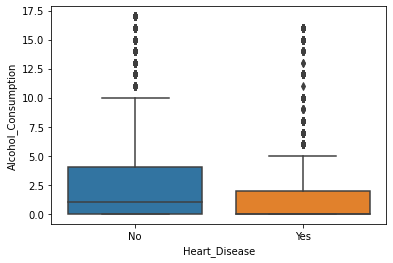

In [103]:
sns.boxplot(x=df['Heart_Disease'],y=df['Alcohol_Consumption'])

<AxesSubplot:xlabel='Heart_Disease', ylabel='Fruit_Consumption'>

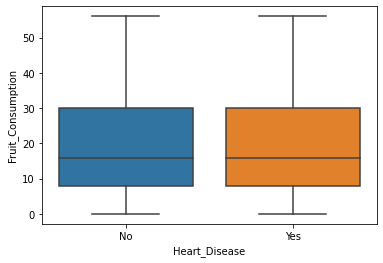

In [104]:
sns.boxplot(x=df['Heart_Disease'],y=df['Fruit_Consumption'])

<AxesSubplot:xlabel='Heart_Disease', ylabel='Green_Vegetables_Consumption'>

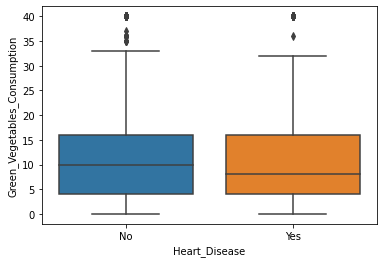

In [105]:
sns.boxplot(x=df['Heart_Disease'],y=df['Green_Vegetables_Consumption'])

<AxesSubplot:xlabel='Heart_Disease', ylabel='FriedPotato_Consumption'>

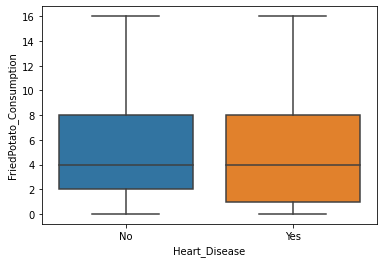

In [106]:
sns.boxplot(x=df['Heart_Disease'],y=df['FriedPotato_Consumption'])

In [107]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


<AxesSubplot:xlabel='Heart_Disease', ylabel='Green_Vegetables_Consumption'>

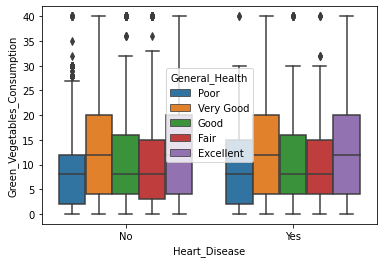

In [108]:
sns.boxplot(x=df['Heart_Disease'],y=df['Green_Vegetables_Consumption'],hue=df['General_Health'])

<AxesSubplot:xlabel='Heart_Disease', ylabel='Fruit_Consumption'>

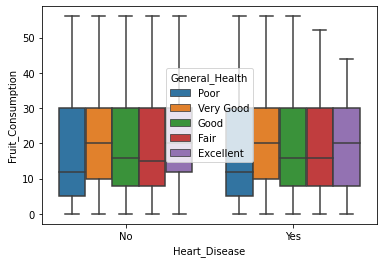

In [109]:
sns.boxplot(x=df['Heart_Disease'],y=df['Fruit_Consumption'],hue=df['General_Health'])

<AxesSubplot:xlabel='Heart_Disease', ylabel='Alcohol_Consumption'>

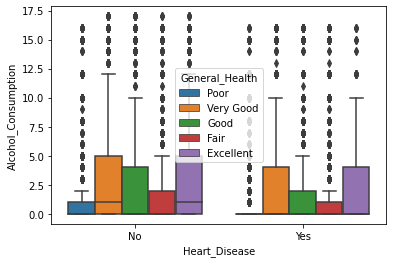

In [110]:
sns.boxplot(x=df['Heart_Disease'],y=df['Alcohol_Consumption'],hue=df['General_Health'])

<AxesSubplot:xlabel='Heart_Disease', ylabel='BMI'>

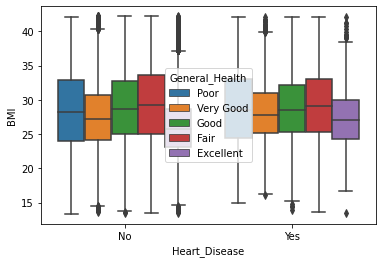

In [111]:
sns.boxplot(x=df['Heart_Disease'],y=df['BMI'],hue=df['General_Health'])

<AxesSubplot:xlabel='Heart_Disease', ylabel='Height_(cm)'>

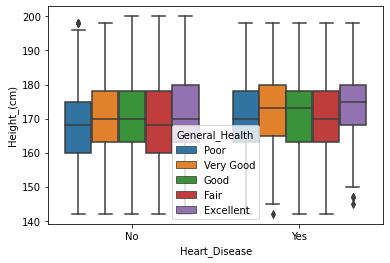

In [112]:
sns.boxplot(x=df['Heart_Disease'],y=df['Height_(cm)'],hue=df['General_Health'])

<AxesSubplot:xlabel='Heart_Disease', ylabel='Weight_(kg)'>

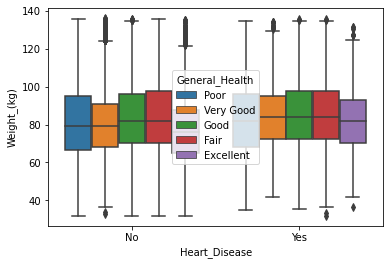

In [113]:
sns.boxplot(x=df['Heart_Disease'],y=df['Weight_(kg)'],hue=df['General_Health'])

<AxesSubplot:xlabel='Heart_Disease', ylabel='FriedPotato_Consumption'>

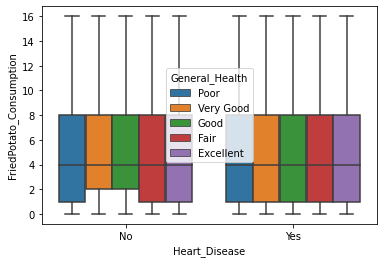

In [114]:
sns.boxplot(x=df['Heart_Disease'],y=df['FriedPotato_Consumption'],hue=df['General_Health'])

In [115]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308848,Good,Within the past 5 years,Yes,No,No,No,No,No,No,Male,55-59,168.0,58.97,20.98,No,0.0,16.0,12.0,0.0
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


<AxesSubplot:xlabel='Heart_Disease', ylabel='FriedPotato_Consumption'>

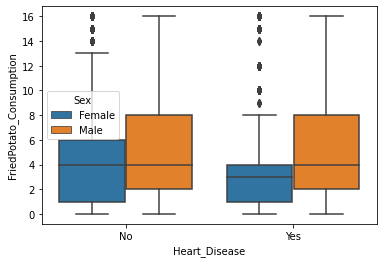

In [116]:
sns.boxplot(x=df['Heart_Disease'],y=df['FriedPotato_Consumption'],hue=df['Sex'])

<AxesSubplot:xlabel='Heart_Disease', ylabel='Height_(cm)'>

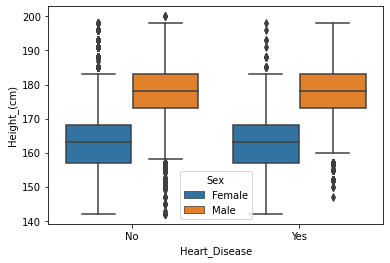

In [117]:
sns.boxplot(x=df['Heart_Disease'],y=df['Height_(cm)'],hue=df['Sex'])

<AxesSubplot:xlabel='Heart_Disease', ylabel='Weight_(kg)'>

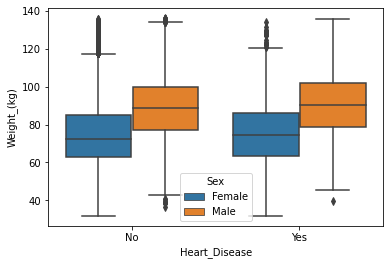

In [118]:
sns.boxplot(x=df['Heart_Disease'],y=df['Weight_(kg)'],hue=df['Sex'])

<AxesSubplot:xlabel='Heart_Disease', ylabel='BMI'>

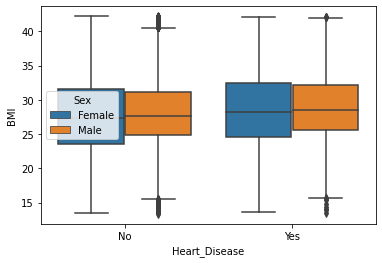

In [119]:
sns.boxplot(x=df['Heart_Disease'],y=df['BMI'],hue=df['Sex'])

<AxesSubplot:xlabel='Heart_Disease', ylabel='Alcohol_Consumption'>

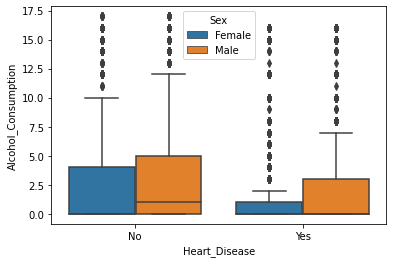

In [120]:

sns.boxplot(x=df['Heart_Disease'],y=df['Alcohol_Consumption'],hue=df['Sex'])

<AxesSubplot:xlabel='Heart_Disease', ylabel='Green_Vegetables_Consumption'>

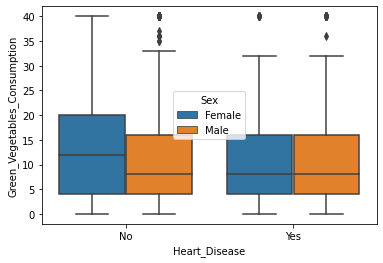

In [121]:
sns.boxplot(x=df['Heart_Disease'],y=df['Green_Vegetables_Consumption'],hue=df['Sex'])

In [122]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308848,Good,Within the past 5 years,Yes,No,No,No,No,No,No,Male,55-59,168.0,58.97,20.98,No,0.0,16.0,12.0,0.0
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [123]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308848,Good,Within the past 5 years,Yes,No,No,No,No,No,No,Male,55-59,168.0,58.97,20.98,No,0.0,16.0,12.0,0.0
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


<AxesSubplot:xlabel='Heart_Disease', ylabel='Green_Vegetables_Consumption'>

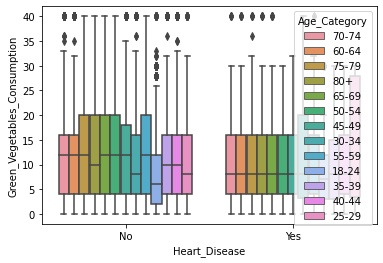

In [124]:
sns.boxplot(x=df['Heart_Disease'],y=df['Green_Vegetables_Consumption'],hue=df['Age_Category'])

<AxesSubplot:xlabel='Heart_Disease', ylabel='FriedPotato_Consumption'>

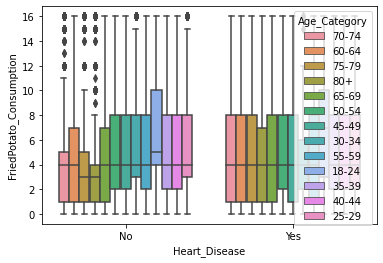

In [125]:
sns.boxplot(x=df['Heart_Disease'],y=df['FriedPotato_Consumption'],hue=df['Age_Category'])

<AxesSubplot:xlabel='Heart_Disease', ylabel='Fruit_Consumption'>

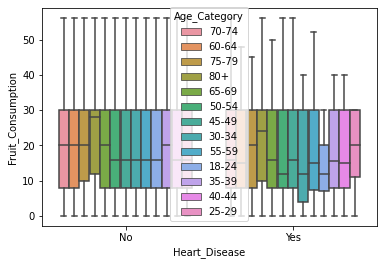

In [126]:
sns.boxplot(x=df['Heart_Disease'],y=df['Fruit_Consumption'],hue=df['Age_Category'])

<AxesSubplot:xlabel='Heart_Disease', ylabel='Alcohol_Consumption'>

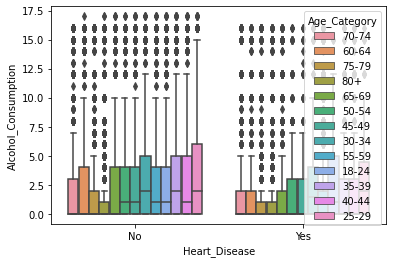

In [127]:
sns.boxplot(x=df['Heart_Disease'],y=df['Alcohol_Consumption'],hue=df['Age_Category'])

<AxesSubplot:xlabel='Heart_Disease', ylabel='Height_(cm)'>

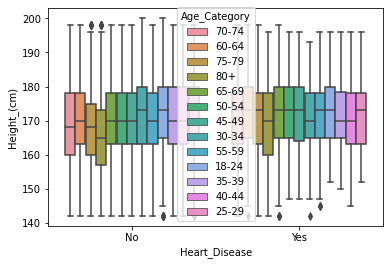

In [128]:
sns.boxplot(x=df['Heart_Disease'],y=df['Height_(cm)'],hue=df['Age_Category'])

<AxesSubplot:xlabel='Heart_Disease', ylabel='Weight_(kg)'>

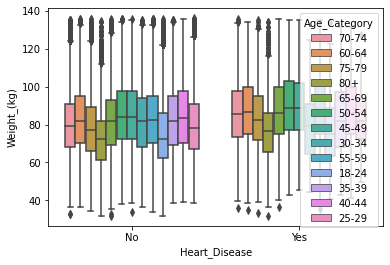

In [129]:
sns.boxplot(x=df['Heart_Disease'],y=df['Weight_(kg)'],hue=df['Age_Category'])

<AxesSubplot:xlabel='Heart_Disease', ylabel='BMI'>

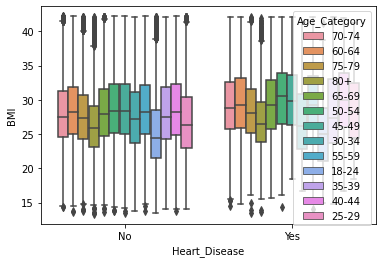

In [130]:
sns.boxplot(x=df['Heart_Disease'],y=df['BMI'],hue=df['Age_Category'])

In [131]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,185765.000000,185765.000000,185765.000000,185765.000000,185765.000000,185765.000000,185765.000000
mean,170.383011,81.827178,28.089438,2.694027,18.481382,11.943622,4.885624
std,10.370806,17.961072,5.204597,4.065518,10.886695,9.608176,4.252884
min,142.000000,31.750000,13.350000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.330000,0.000000,8.000000,4.000000,2.000000
50%,170.000000,81.650000,27.460000,0.000000,16.000000,10.000000,4.000000
75%,178.000000,92.990000,31.460000,4.000000,30.000000,16.000000,8.000000
max,200.000000,136.000000,42.180000,17.000000,56.000000,40.000000,16.000000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height_(cm)', ylabel='Density'>

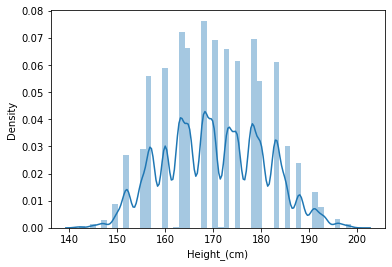

In [132]:
sns.distplot(df['Height_(cm)'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight_(kg)', ylabel='Density'>

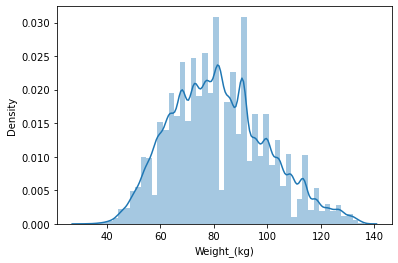

In [133]:
sns.distplot(df['Weight_(kg)'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

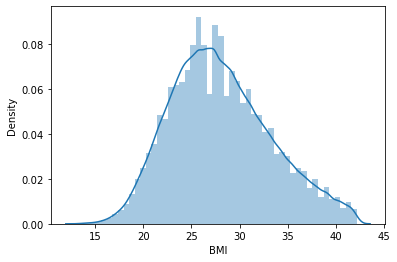

In [134]:
sns.distplot(df['BMI'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Alcohol_Consumption', ylabel='Density'>

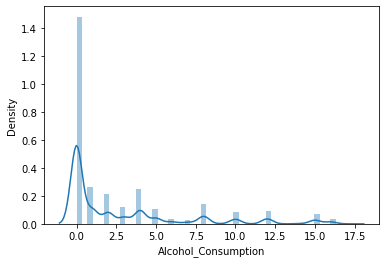

In [135]:
sns.distplot(df['Alcohol_Consumption'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fruit_Consumption', ylabel='Density'>

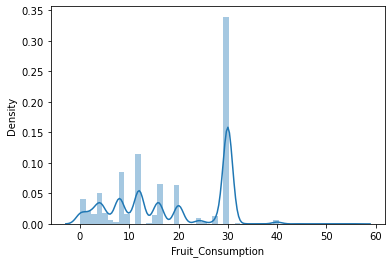

In [136]:
sns.distplot(df['Fruit_Consumption'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Green_Vegetables_Consumption', ylabel='Density'>

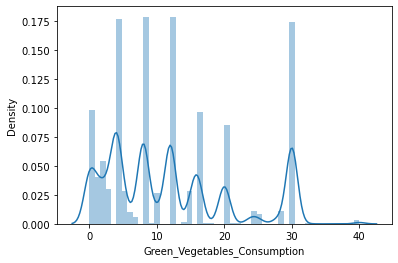

In [137]:
sns.distplot(df['Green_Vegetables_Consumption'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FriedPotato_Consumption', ylabel='Density'>

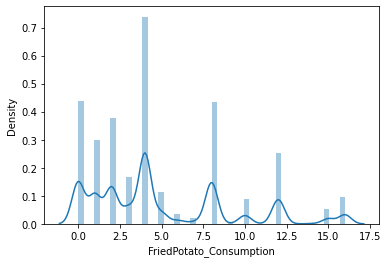

In [138]:
sns.distplot(df['FriedPotato_Consumption'])

<AxesSubplot:>

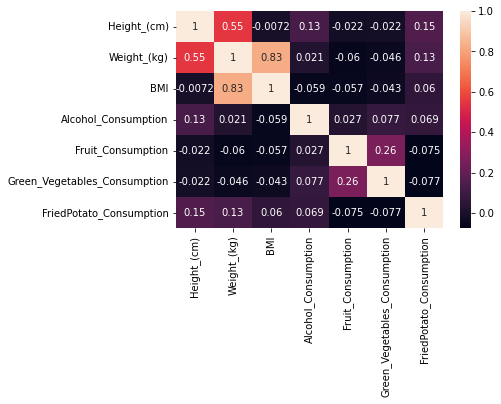

In [139]:
sns.heatmap(data=df.corr(),annot=True)

In [140]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308848,Good,Within the past 5 years,Yes,No,No,No,No,No,No,Male,55-59,168.0,58.97,20.98,No,0.0,16.0,12.0,0.0
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


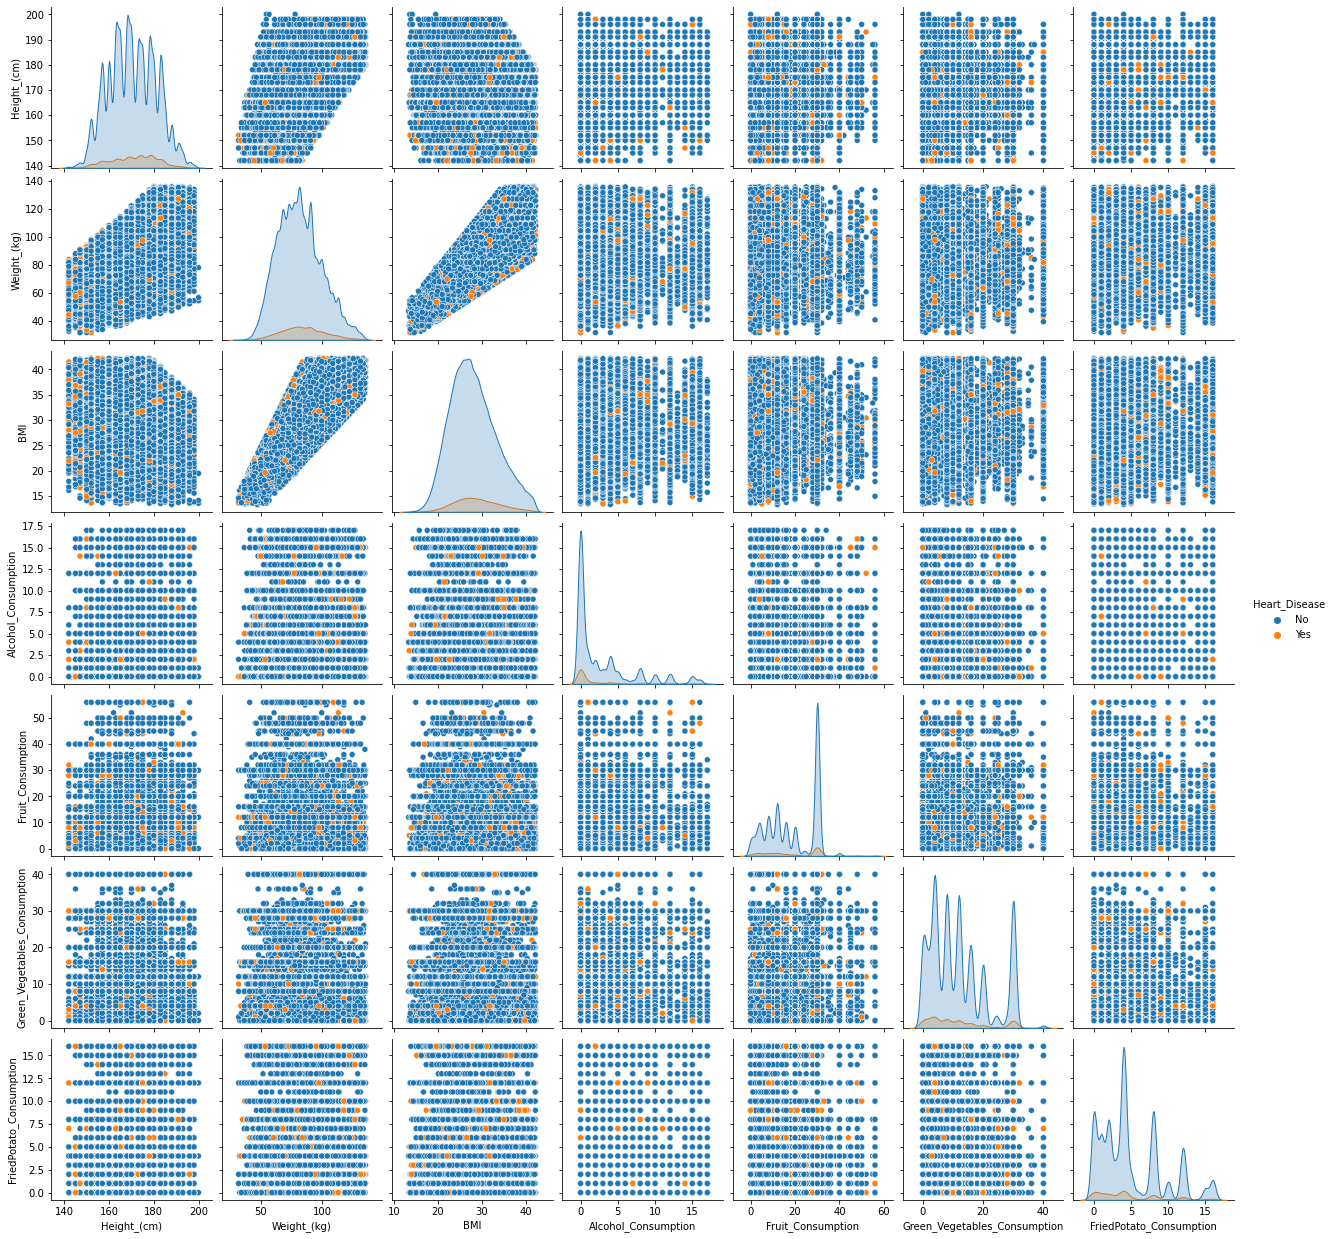

In [141]:
sns.pairplot(data=df,hue='Heart_Disease')

In [142]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308848,Good,Within the past 5 years,Yes,No,No,No,No,No,No,Male,55-59,168.0,58.97,20.98,No,0.0,16.0,12.0,0.0
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [143]:
le=LabelEncoder()


In [144]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [145]:
df['General_Health']=le.fit_transform(df['General_Health'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_24644\1983042109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['General_Health']=le.fit_transform(df['General_Health'])


In [146]:
df['Checkup']=le.fit_transform(df['Checkup'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_24644\3685303791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Checkup']=le.fit_transform(df['Checkup'])


In [147]:
df['Smoking_History']=le.fit_transform(df['Smoking_History'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_24644\2379550601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Smoking_History']=le.fit_transform(df['Smoking_History'])


In [148]:
df['Sex']=le.fit_transform(df['Sex'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_24644\2537462055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex']=le.fit_transform(df['Sex'])


In [149]:
df['Arthritis']=le.fit_transform(df['Arthritis'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_24644\1684118777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Arthritis']=le.fit_transform(df['Arthritis'])


In [150]:
df['Diabetes']=le.fit_transform(df['Diabetes'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_24644\2118130306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Diabetes']=le.fit_transform(df['Diabetes'])


In [151]:
df['Depression']=le.fit_transform(df['Depression'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_24644\2803027482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Depression']=le.fit_transform(df['Depression'])


In [152]:
df['Other_Cancer']=le.fit_transform(df['Other_Cancer'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_24644\1634018050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Other_Cancer']=le.fit_transform(df['Other_Cancer'])


In [153]:
df['Skin_Cancer']=le.fit_transform(df['Skin_Cancer'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_24644\1414970030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Skin_Cancer']=le.fit_transform(df['Skin_Cancer'])


In [154]:
df['Heart_Disease']=le.fit_transform(df['Heart_Disease'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_24644\1201002154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Heart_Disease']=le.fit_transform(df['Heart_Disease'])


In [155]:
df['Exercise']=le.fit_transform(df['Exercise'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_24644\3665895967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Exercise']=le.fit_transform(df['Exercise'])


In [156]:
df['Checkup']=le.fit_transform(df['Checkup'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_24644\3685303791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Checkup']=le.fit_transform(df['Checkup'])


In [157]:
df['Age_Category']=le.fit_transform(df['Age_Category'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_24644\2461311546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Category']=le.fit_transform(df['Age_Category'])


In [158]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,3,4,1,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308848,2,3,1,0,0,0,0,0,0,1,7,168.0,58.97,20.98,0,0.0,16.0,12.0,0.0
308849,4,4,1,0,0,0,0,0,0,1,1,168.0,81.65,29.05,0,4.0,30.0,8.0,0.0
308851,4,0,1,0,0,0,1,3,0,0,2,157.0,61.23,24.69,1,4.0,40.0,8.0,4.0
308852,4,4,1,0,0,0,0,0,0,1,9,183.0,79.38,23.73,0,3.0,30.0,12.0,0.0


<AxesSubplot:xlabel='Weight_(kg)', ylabel='BMI'>

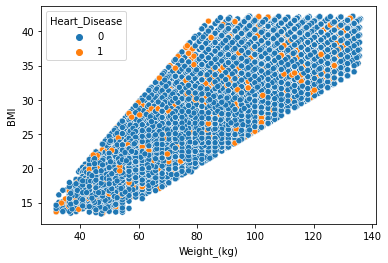

In [159]:
sns.scatterplot(x=df['Weight_(kg)'],y=df['BMI'],hue=df['Heart_Disease'])

In [160]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,3,4,1,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308848,2,3,1,0,0,0,0,0,0,1,7,168.0,58.97,20.98,0,0.0,16.0,12.0,0.0
308849,4,4,1,0,0,0,0,0,0,1,1,168.0,81.65,29.05,0,4.0,30.0,8.0,0.0
308851,4,0,1,0,0,0,1,3,0,0,2,157.0,61.23,24.69,1,4.0,40.0,8.0,4.0
308852,4,4,1,0,0,0,0,0,0,1,9,183.0,79.38,23.73,0,3.0,30.0,12.0,0.0


In [161]:
y=df['Heart_Disease']

In [162]:
X=df.drop(['Heart_Disease','BMI'],axis=1)

In [163]:
df['Heart_Disease'].value_counts()

0    170030
1     15735
Name: Heart_Disease, dtype: int64

In [164]:
from imblearn.over_sampling import SMOTE

In [165]:
smote=SMOTE(sampling_strategy='minority')

In [166]:
X_sm,y_sm=smote.fit_resample(X,y)


In [167]:
X_sm.shape

(340060, 17)

In [168]:
y_sm.shape

(340060,)

In [169]:
rfc=RandomForestClassifier()


In [170]:
sc=StandardScaler()


In [171]:
X_sm=sc.fit_transform(X_sm)


In [172]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)

In [173]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [174]:
y_pred=rfc.predict(X_test)


In [175]:
accuracy_score(y_test,y_pred)

0.9294683291183908

In [176]:
KF=KFold(5)


In [177]:
scores=cross_val_score(rfc,X_test,y_test,cv=KF)

In [178]:
scores

array([0.88127619, 0.8774535 , 0.88185561, 0.87862079, 0.87810616])

In [179]:
scores.mean()

0.8794624506735484

In [180]:
knc=KNeighborsClassifier()


In [181]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [182]:
y_pred=knc.predict(X_test)


In [183]:
accuracy_score(y_test,y_pred)

0.8435423160618715

In [184]:
KF=KFold(5)


In [185]:
scores=cross_val_score(knc,X_test,y_test,cv=KF)

In [186]:
scores

array([0.79188414, 0.78012203, 0.78620791, 0.77870901, 0.77819438])

In [187]:
scores.mean()

0.7830234964538287

In [188]:
import tensorflow as tf

In [189]:
from tensorflow import keras

In [193]:
model=keras.Sequential([
    keras.layers.Dense(15,input_shape=(17,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [194]:
model.compile(optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy'])

In [195]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
8502/8502 [==============================] - 12s 1ms/step - loss: 0.4638 - accuracy: 0.7811
Epoch 2/100
8502/8502 [==============================] - 14s 2ms/step - loss: 0.4292 - accuracy: 0.8031
Epoch 3/100
8502/8502 [==============================] - 14s 2ms/step - loss: 0.4114 - accuracy: 0.8125
Epoch 4/100
8502/8502 [==============================] - 15s 2ms/step - loss: 0.4055 - accuracy: 0.8158
Epoch 5/100
8502/8502 [==============================] - 13s 2ms/step - loss: 0.4035 - accuracy: 0.8167
Epoch 6/100
8502/8502 [==============================] - 14s 2ms/step - loss: 0.4021 - accuracy: 0.8172
Epoch 7/100
8502/8502 [==============================] - 14s 2ms/step - loss: 0.4016 - accuracy: 0.8176
Epoch 8/100
8502/8502 [==============================] - 14s 2ms/step - loss: 0.4010 - accuracy: 0.8175
Epoch 9/100
8502/8502 [==============================] - 14s 2ms/step - loss: 0.4005 - accuracy: 0.8184
Epoch 10/100
8502/8502 [==============================] - 16s 2m

In [196]:
y_pred=model.predict(X_test)


2126/2126 [==============================] - 2s 754us/step


In [197]:
model.evaluate(X_test,y_test)

2126/2126 [==============================] - 2s 891us/step - loss: 0.3970 - accuracy: 0.8194


[0.3970300853252411, 0.8193700909614563]

In [198]:
y_pred[:10]

array([[0.9323597 ],
       [0.130152  ],
       [0.9734397 ],
       [0.12094599],
       [0.7422459 ],
       [0.01877425],
       [0.98602337],
       [0.72942436],
       [0.88693494],
       [0.00832205]], dtype=float32)

In [199]:
ypred=[]

for i in y_pred:
    if i>0.5:
        ypred.append(1)
    else:
        ypred.append(0)

In [200]:
y_test[:100]

316987    1
181471    0
307689    1
106713    0
875       1
         ..
271013    1
86676     0
5858      0
124999    1
252209    1
Name: Heart_Disease, Length: 100, dtype: int32

In [201]:
ypred[:10]

[1, 0, 1, 0, 1, 0, 1, 1, 1, 0]

In [202]:
y_test[:10]

316987    1
181471    0
307689    1
106713    0
875       1
84949     0
230342    1
326511    1
205280    1
80404     0
Name: Heart_Disease, dtype: int32

In [203]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=ypred)

<AxesSubplot:>

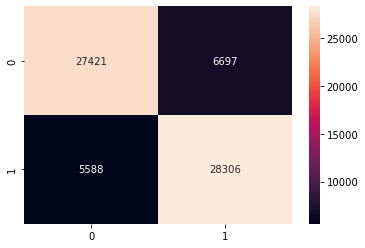

In [204]:
sns.heatmap(data=cm,fmt='d',annot=True)

In [205]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82     34118
           1       0.81      0.84      0.82     33894

    accuracy                           0.82     68012
   macro avg       0.82      0.82      0.82     68012
weighted avg       0.82      0.82      0.82     68012

